In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import read_excel

from sklearn import metrics

from sklearn.pipeline import Pipeline

from sklearn import model_selection

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn import ensemble

#import category_encoders as ce

import pickle

import psycopg2

import os

import pandas.io.sql as psql

In [6]:
DATABASE_URL = os.environ['DATABASE_URL']


In [7]:

conn = psycopg2.connect(DATABASE_URL, sslmode='require')
df = psql.read_sql('SELECT * FROM corridas', conn)
#product_category = psql.read_sql_query('select * from product_category', connection)
conn.close()
df

,id,date,distancia,duration
0,791,2022-02-13 09:53:12,5.01,0 days 00:34:22
1,792,2022-02-06 09:34:34,2.90,0 days 00:33:30
2,793,2022-02-05 09:14:42,8.00,0 days 00:54:55
3,794,2022-02-02 07:39:37,5.09,0 days 00:35:05
4,795,2022-01-30 10:58:47,5.42,0 days 00:37:12
...,...,...,...,...
390,1181,2015-05-31 08:45:46,17.30,0 days 01:55:01
391,1182,2015-05-24 10:20:25,13.62,0 days 01:35:20
392,1183,2015-05-03 09:44:33,10.89,0 days 01:20:27
393,1184,2015-04-26 10:52:26,11.10,0 days 01:12:07


In [8]:
df['week_number'] = df['date'].dt.year.astype(str) + '-' + (df['date'].dt.week + 100).astype(str).str[1:3]
df['dia_semana'] = (df['date'].dt.weekday + 100).astype(str).str[1:3]
df

C:\Users\csati\AppData\Local\Temp/ipykernel_11676/419728865.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_number'] = df['date'].dt.year.astype(str) + '-' + (df['date'].dt.week + 100).astype(str).str[1:3]


,id,date,distancia,duration,week_number,dia_semana
0,791,2022-02-13 09:53:12,5.01,0 days 00:34:22,2022-06,06
1,792,2022-02-06 09:34:34,2.90,0 days 00:33:30,2022-05,06
2,793,2022-02-05 09:14:42,8.00,0 days 00:54:55,2022-05,05
3,794,2022-02-02 07:39:37,5.09,0 days 00:35:05,2022-05,02
4,795,2022-01-30 10:58:47,5.42,0 days 00:37:12,2022-04,06
...,...,...,...,...,...,...
390,1181,2015-05-31 08:45:46,17.30,0 days 01:55:01,2015-22,06
391,1182,2015-05-24 10:20:25,13.62,0 days 01:35:20,2015-21,06
392,1183,2015-05-03 09:44:33,10.89,0 days 01:20:27,2015-18,06
393,1184,2015-04-26 10:52:26,11.10,0 days 01:12:07,2015-17,06


In [9]:
df['dia_semana'].unique()

array(['06', '05', '02', '03', '01', '04', '00'], dtype=object)

In [10]:
df['vol_semanal'] = df['distancia'].groupby(df['week_number']).transform('sum')

In [11]:
df

,id,date,distancia,duration,week_number,dia_semana,vol_semanal
0,791,2022-02-13 09:53:12,5.01,0 days 00:34:22,2022-06,06,5.01
1,792,2022-02-06 09:34:34,2.90,0 days 00:33:30,2022-05,06,15.99
2,793,2022-02-05 09:14:42,8.00,0 days 00:54:55,2022-05,05,15.99
3,794,2022-02-02 07:39:37,5.09,0 days 00:35:05,2022-05,02,15.99
4,795,2022-01-30 10:58:47,5.42,0 days 00:37:12,2022-04,06,17.25
...,...,...,...,...,...,...,...
390,1181,2015-05-31 08:45:46,17.30,0 days 01:55:01,2015-22,06,17.30
391,1182,2015-05-24 10:20:25,13.62,0 days 01:35:20,2015-21,06,13.62
392,1183,2015-05-03 09:44:33,10.89,0 days 01:20:27,2015-18,06,10.89
393,1184,2015-04-26 10:52:26,11.10,0 days 01:12:07,2015-17,06,16.48


In [12]:
df['vol_semanal_ant'] = df.vol_semanal.shift(-1)

In [13]:
df['vol_semanal_ant2'] = df.vol_semanal.shift(-2)
df


,id,date,distancia,duration,week_number,dia_semana,vol_semanal,vol_semanal_ant,vol_semanal_ant2
0,791,2022-02-13 09:53:12,5.01,0 days 00:34:22,2022-06,06,5.01,15.99,15.99
1,792,2022-02-06 09:34:34,2.90,0 days 00:33:30,2022-05,06,15.99,15.99,15.99
2,793,2022-02-05 09:14:42,8.00,0 days 00:54:55,2022-05,05,15.99,15.99,17.25
3,794,2022-02-02 07:39:37,5.09,0 days 00:35:05,2022-05,02,15.99,17.25,17.25
4,795,2022-01-30 10:58:47,5.42,0 days 00:37:12,2022-04,06,17.25,17.25,17.25
...,...,...,...,...,...,...,...,...,...
390,1181,2015-05-31 08:45:46,17.30,0 days 01:55:01,2015-22,06,17.30,13.62,10.89
391,1182,2015-05-24 10:20:25,13.62,0 days 01:35:20,2015-21,06,13.62,10.89,16.48
392,1183,2015-05-03 09:44:33,10.89,0 days 01:20:27,2015-18,06,10.89,16.48,16.48
393,1184,2015-04-26 10:52:26,11.10,0 days 01:12:07,2015-17,06,16.48,16.48,NaN


In [38]:
fds = []
for row in df['dia_semana']:
    if row=='06' or row=='05':
        fds.append(1)
    else:
        fds.append(0)


In [39]:
df['fds'] = fds
df

C:\Users\csati\AppData\Local\Temp/ipykernel_11676/715100785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fds'] = fds


,id,date,distancia,duration,week_number,dia_semana,vol_semanal,vol_semanal_ant,vol_semanal_ant2,fds,pred
0,791,2022-02-13 09:53:12,5.01,0 days 00:34:22,2022-06,06,5.01,15.99,15.99,1,6.020967
1,792,2022-02-06 09:34:34,2.90,0 days 00:33:30,2022-05,06,15.99,15.99,15.99,1,6.020967
2,793,2022-02-05 09:14:42,8.00,0 days 00:54:55,2022-05,05,15.99,15.99,17.25,1,6.401163
3,794,2022-02-02 07:39:37,5.09,0 days 00:35:05,2022-05,02,15.99,17.25,17.25,0,7.219962
4,795,2022-01-30 10:58:47,5.42,0 days 00:37:12,2022-04,06,17.25,17.25,17.25,1,7.510844
...,...,...,...,...,...,...,...,...,...,...,...
388,1179,2015-10-25 11:25:29,5.23,0 days 00:37:21,2015-43,06,5.23,9.67,17.30,1,7.675827
389,1180,2015-06-07 08:44:31,9.67,0 days 01:05:15,2015-23,06,9.67,17.30,13.62,1,7.480168
390,1181,2015-05-31 08:45:46,17.30,0 days 01:55:01,2015-22,06,17.30,13.62,10.89,1,5.981304
391,1182,2015-05-24 10:20:25,13.62,0 days 01:35:20,2015-21,06,13.62,10.89,16.48,1,7.370454


In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( df[['fds','vol_semanal_ant','vol_semanal_ant2']],
                                                                     df['distancia'],
                                                                     random_state=1992,
                                                                     test_size=0.25,
                                                                     shuffle=False)

In [41]:
X_train

,fds,vol_semanal_ant,vol_semanal_ant2
0,1,15.99,15.99
1,1,15.99,15.99
2,1,15.99,17.25
3,0,17.25,17.25
4,1,17.25,17.25
...,...,...,...
289,0,12.83,12.83
290,0,12.83,21.00
291,0,21.00,21.00
292,1,21.00,21.00


In [42]:
model_rf = ensemble.RandomForestRegressor(random_state=1992) # Definição do modelo

full_pipeline_rf = Pipeline( steps=[ ('modelo', model_rf) ] )

param_grid = { "modelo__n_estimators":[2,3,5,10,20],
               "modelo__max_depth":[None,7,8,9,10],
               "modelo__min_samples_split":[10,11,12],
               "modelo__min_samples_leaf":[1,2,5,7,10] }


search_rf = model_selection.GridSearchCV(full_pipeline_rf,
                                          param_grid,
                                          cv=5,
                                          n_jobs=-1,
                                          scoring='neg_root_mean_squared_error') # Declaração

search_rf.fit(X_train, y_train) # Executa o treinamento!!

best_model_rf = search_rf.best_estimator_

In [43]:
best_model_rf

Pipeline(steps=[('modelo',
                 RandomForestRegressor(min_samples_leaf=10,
                                       min_samples_split=10, n_estimators=10,
                                       random_state=1992))])

In [44]:
y_test_pred_rf = best_model_rf.predict(X_test)
y_test_pred_rf

array([12.21110515, 18.73902315, 11.11030115,  7.55186533,  9.38747137,
        9.29840379, 11.03313339,  9.57813905, 12.03266495, 10.27910945,
        6.79821039,  7.04451907,  8.38193689,  9.29840379, 10.20727069,
        8.12536573,  8.94160246,  9.29840379,  9.82658932,  9.67908516,
        7.07722602,  7.45844819,  7.26358157,  7.26358157,  7.04451907,
        7.04451907,  7.15116358,  6.05884803,  5.55223195,  7.10188977,
        6.77329387,  8.12536573,  8.62594808,  8.44102011,  9.29840379,
        9.82658932,  9.29840379,  9.10212591,  6.60174062,  5.99472177,
        5.5659889 ,  6.73905942,  7.04451907,  6.853903  ,  6.6632969 ,
        8.12536573,  8.62594808,  7.85250209,  6.04681028,  8.3005784 ,
        9.71330032, 10.24148584, 10.24148584,  9.71330032,  8.80706986,
        6.04681028,  7.16386053,  5.36740368,  5.1713182 ,  6.81940049,
        7.0190298 ,  6.82841373,  6.71813826,  6.9647583 ,  7.20099209,
        5.29374472,  6.04681028,  7.0854981 ,  7.20763561,  5.92

In [45]:
root_mean_squared_erro_rf = metrics.mean_squared_error( y_test, y_test_pred_rf) ** (1/2)

print( "Raiz do Erro Quadrático Médio XGBoost:", (-1) * root_mean_squared_erro_rf)

Raiz do Erro Quadrático Médio XGBoost: -3.447919925299367


In [46]:
X_test


,fds,vol_semanal_ant,vol_semanal_ant2
294,0,42.57,42.57
295,1,42.57,42.57
296,0,42.57,21.24
297,0,21.24,21.24
298,1,21.24,20.63
...,...,...,...
388,1,9.67,17.30
389,1,17.30,13.62
390,1,13.62,10.89
391,1,10.89,16.48


In [50]:
data = {'fds': 1,
        'vol_semanal_ant': [30],
        'vol_semanal_ant2': [25]
        }
best_model_rf.predict(pd.DataFrame(data))

array([12.53650993])

In [51]:
y_pred = best_model_rf.predict(df[['fds','vol_semanal_ant','vol_semanal_ant2']])

In [52]:
df['pred'] = y_pred

C:\Users\csati\AppData\Local\Temp/ipykernel_11676/2934069404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = y_pred


In [53]:
Pkl_Filename = "../model/best_model_rf_pg.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_model_rf, file)

In [54]:
best_model_rf

Pipeline(steps=[('modelo',
                 RandomForestRegressor(min_samples_leaf=10,
                                       min_samples_split=10, n_estimators=10,
                                       random_state=1992))])

In [55]:
model_loaded = pickle.load(open('../model/best_model_rf_pg.pkl', 'rb'))

In [56]:
data = {'fds': 1,
        'vol_semanal_ant': [30],
        'vol_semanal_ant2': [25]
        }
model_loaded.predict(pd.DataFrame(data))

array([12.53650993])

In [57]:
import matplotlib.pyplot as plt

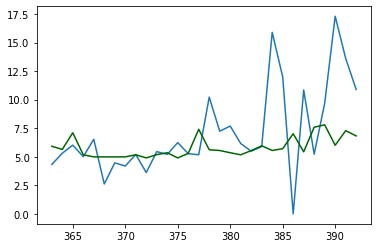

In [58]:
plt.plot(df.distancia.tail(30))
plt.plot(df.pred.tail(30), color='darkgreen')


plt.title("")
plt.show()